C:\Users\Rohan Jain\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


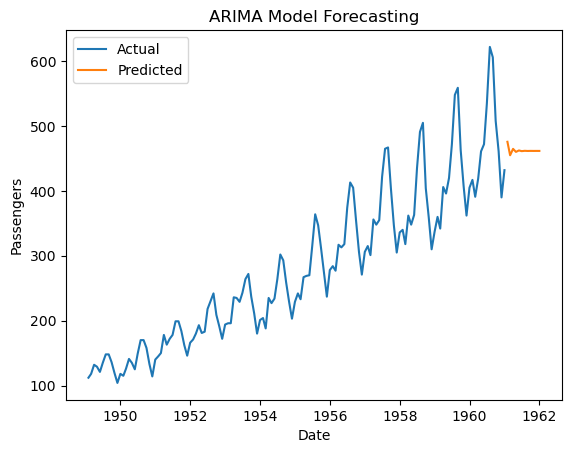

Root Mean Squared Error (RMSE): 76.29


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.datasets import get_rdataset
air_passengers = get_rdataset('AirPassengers', 'datasets').data['value']
air_passengers.index = pd.date_range(start='1949-01-01', periods=len(air_passengers), freq='M')
model = ARIMA(air_passengers, order=(1, 1, 1))
model_fit = model.fit()
predictions = model_fit.predict(start=len(air_passengers), end=len(air_passengers)+11, typ='levels')
plt.plot(air_passengers.index, air_passengers, label='Actual')
plt.plot(predictions.index, predictions, label='Predicted')
plt.title('ARIMA Model Forecasting')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()
rmse = sqrt(mean_squared_error(air_passengers[-12:], predictions))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
